In [27]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re
pd.options.mode.chained_assignment = None

In [28]:
# Load the dataset (csv file) into a Pandas DataFrame.
data = pd.read_csv('the-hello-dataset-fa22.csv')
data

,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
0,Muhammad Usman,Male,440,369,2.8,Black,March,77
1,Taha Ishfaq,Male,415,408,2.73,Red,March,72
2,Muhammad Hamdan,Male,388,321,2.78,Black,October,53
3,Syeda Maham Gillani,Female,412,440,3.11,Blue,February,63
4,Umar Wasim,Male,364,469,2.42,black,October,80
...,...,...,...,...,...,...,...,...
129,M Abubakar Malik,Male,410,349,2.94,Blue,Feburary,65
130,Muhammad Ali,Male,403,390,2.52,Yellow,October,81
131,shafaqat ali,Male,424,824,3.07,Black,May,58
132,Ammar Asif,Male,351,423,2.52,Black,December,68


In [29]:
# Cleaning the Dataset

# Cleaning the Symbols from HSSC-1 marks (Like: obtained_marks/total_marks format, grade in % percentage to obtained_marks format i.e 60% to 300)
marks = []
for i in range(len(data['HSSC-1'])):
    marks = data['HSSC-1'][i]
    if ('/' in str(marks)):
        obtained_marks, total_marks = marks.split('/')
        data['HSSC-1'][i] = obtained_marks
    if '%' in str(marks):
        marks, null = marks.split('%')
        obtained_marks = int((int(marks) / 100) * 510)
        data['HSSC-1'][i] = str(obtained_marks)

# Cleaning the Symbols from HSSC-2 marks (Like: obtained_marks/total_marks format, 737 (total) format)
marks = []    
for i in range(len(data['HSSC-2'])):
    marks = str(data['HSSC-2'][i])
    if '/' in marks:
        obtained_marks, total_marks = marks.split('/')
        marks = obtained_marks
    if '(' in marks:
        obtained_marks, null = marks.split('(')
        marks = obtained_marks
    data['HSSC-2'][i] = marks


# Calculating Correct Marks of HSSC-2 out of 590
marks = []
for i in range(len(data['HSSC-2'])):
    marks = int(data['HSSC-2'][i])
    if(marks > 590):
        marks = marks - 590
    data['HSSC-2'][i] = str(marks)


# Removing Discrepancies from CGPA (like: 2.84. to 2.84)
marks = []
for i in range(len(data['CGPA'])):
    marks = str(data['CGPA'][i])
    cgpa = marks.split('.')
    if(len(cgpa) > 1):
        marks = cgpa[0] + '.' + cgpa[1]
    else:
        marks = cgpa[0]
    data['CGPA'][i] = marks


# Removing kg Units from Weights (like: 60kg to 60)
weight = []    
for i in range(len(data['Weight'])):
    weight = data['Weight'][i]
    if 'kg' in weight:
        w, null = weight.split('k')
        weight = w
    data['Weight'][i] = weight


# Normalizing the Month Names (like: spelling mistakes, shortforms, unnecessary spaces, number for month, consistent upper and lower case)
months_upper = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_lower = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

for i in range(len(data['BirthMonth'])):
    month = data['BirthMonth'][i].strip()
    
    if '/' in month:
        date = month.split('/')
        month_no = int(date[1])
        month = months_upper[month_no - 1]
    if month.isdigit():
        month_no = int(month)
        month = months_upper[month_no - 1]
    if month == 'Feburary':
        month = 'February'
    
    for j in range(len(months_upper)):
        if (month in months_upper[j]):
            month = months_upper[j]
        if (month in months_lower[j]):
            month = months_upper[j]
    data['BirthMonth'][i] = str.title(month)
    
# Normalizing the Color Names (like: unnecessary spaces, consistent upper and lower case)
color = []   
for i in range(len(data['FavoriteColor'])):
    color = data['FavoriteColor'][i].strip()
    color = str.title(color)
    data['FavoriteColor'][i] = color

In [17]:
# Print the list of all students whose first name starts with letter the 'H'

# Simple Method
i = 1

for name in data['Name']:
    if(re.match(r'H', name)):
        print(f'{i}', name)
        i += 1

# Advance Method
persons = []
i=0
for name in data['Name']:
    if(re.match(r'H', name)):
        name = str.title(data['Name'][i])
        gender = str.title(data['Gender'][i])
        hssc1 = data['HSSC-1'][i]
        hssc2 = data['HSSC-2'][i]
        CGPA = data['CGPA'][i]
        favorite_color = str.title(data['FavoriteColor'][i])
        birth_month = str.title(data['BirthMonth'][i])
        weight = data['Weight'][i]
        person = {'Name': name, 'Gender': gender, 'HSSC-1': hssc1, 'HSSC-2': hssc2, 'CGPA': CGPA, 'FavoriteColor': favorite_color, 'BirthMonth': birth_month, 'Weight': weight}
        persons.append(person)
    i+=1
    
initial_H = pd.DataFrame(persons)
initial_H

# Advance Simple Method
# name_H = data['Name'].str.startswith('H', na = False)
# data[name_H]

1 Hamza Naveed
2 Habib Ullah
3 Hunain Javed
4 Hafiz Malahim Labib.
5 HAMNA TARIQ SALEEMI
6 Hina
7 Hamza Javed Khan
8 Husnain Ahmed 
9 Hamayoun Masroor
10 Hussain afzal


,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
0,Hamza Naveed,Male,954,459,2.8,Blue,May,58
1,Habib Ullah,Male,399,434,3.35,Mustard,April,60
2,Hunain Javed,Male,362,413,2.94,Black,September,76
3,Hafiz Malahim Labib.,Male,390,430,3.24,Orange,May,54
4,Hamna Tariq Saleemi,Female,400,418,2.8,Black,October,62
5,Hina,Female,410,350,2.9,Blue,August,67
6,Hamza Javed Khan,Male,400,381,3.39,Blue,January,78
7,Husnain Ahmed,Male,335,427,2.41,Dark Blue,September,72
8,Hamayoun Masroor,Male,900,266,3.16,Pink,September,63
9,Hussain Afzal,Male,415,346,2.87,Blue,March,81


In [18]:
# Print the total number of students who have a three words name (first-middle-surname).

results = []
for name in data['Name']:
    name = re.findall(r'(\w+)(\s)(\w+)(\s)(\w+)', name)
    if name != []:
        jsonObj = {'name':name[0][0] + name[0][1] + name[0][2] + name[0][3] + name[0][4]}
        results.append(jsonObj)
    
name_3 = pd.DataFrame(results)
name_3

,name
0,Syeda Maham Gillani
1,Shahzada Mujahid Raza
2,Muhammad Subhan Khan
3,SARMAD WAHEED AHMED
4,M Hassaan Lateef
5,Ahmed Amjad Dar
6,Muhammad Ibrahim Khalil
7,Muhammad saim jamil
8,Ahmar Hafeez Khan
9,Muhammad Umar Asghar


In [19]:
# Print the percentage of students who have a CGPA of 3.0 or above.

great_cgpa = 0
for cgpa in data['CGPA']:
    cgpa = float(cgpa)
    if (cgpa >= 3):
        print(great_cgpa+1, str.title(data['Name'][great_cgpa]),'-->  CGPA:', cgpa)
        great_cgpa += 1

total = len(data)
percentage_3 = (great_cgpa/total)*100
print(f'\nTotal Number of Students: {total}')
print(f'Total Number of Students with CGPA >= 3.0: {great_cgpa}')
print(f'Percentage of CGPAS >= 3.0: ' + str(float('{:.2f}'.format(percentage_3))) + '%')

1 Muhammad Usman -->  CGPA: 3.11
2 Taha Ishfaq -->  CGPA: 3.2
3 Muhammad Hamdan -->  CGPA: 3.06
4 Syeda Maham Gillani -->  CGPA: 3.1
5 Umar Wasim -->  CGPA: 3.05
6 Shaanze Basharat -->  CGPA: 3.53
7 Shahzada Mujahid Raza -->  CGPA: 3.3
8 Ayesha Tariq -->  CGPA: 3.26
9 Muhammad Usman -->  CGPA: 3.47
10 Hamza Naveed -->  CGPA: 3.35
11 Fatima Naqvi  -->  CGPA: 3.22
12 Seerat Salman -->  CGPA: 3.2
13 Tayyab Ahmad -->  CGPA: 3.12
14 Muhammad  Zain -->  CGPA: 3.15
15 Muhammad Subhan Khan  -->  CGPA: 3.01
16 Muhammad Adeel -->  CGPA: 3.05
17 Ali Mohsin -->  CGPA: 3.25
18 Sarmad Waheed Ahmed  -->  CGPA: 3.24
19 Mubashar Ali -->  CGPA: 3.12
20 Kiran Rai -->  CGPA: 3.44
21 M Hassaan Lateef  -->  CGPA: 3.19
22 Habib Ullah -->  CGPA: 3.11
23 Hunain Javed -->  CGPA: 3.4
24 Ahmed Amjad Dar  -->  CGPA: 3.0
25 Daniyal Rasheed -->  CGPA: 3.23
26 Azeem Manzoor -->  CGPA: 3.39
27 Muhammad Ibrahim Khalil -->  CGPA: 3.27
28 Abdullah Anjum -->  CGPA: 3.52
29 Adeel Masih -->  CGPA: 3.23
30 Muhammad Tayyab --

Number of Male Students: 113
Number of Female Students: 21


([<matplotlib.patches.Wedge at 0x1979bd39400>,
 [Text(-0.9693525596349224, 0.5199573204881575, 'Male'),
  Text(0.9693525839758803, -0.5199572751094883, 'Female')],
 [Text(-0.5287377598008667, 0.2836130839026313, '84.33%'),
  Text(0.5287377730777528, -0.28361305915062995, '15.67%')])

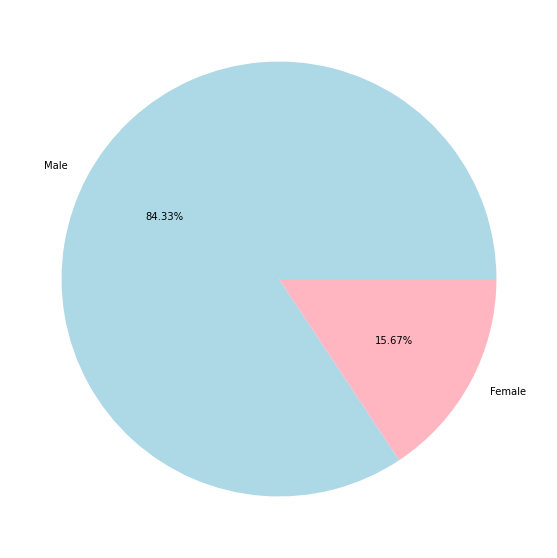

In [20]:
#  Plot a pie chart to show the ratio of male and female students

male_count = 0
female_count = 0
for gender in data['Gender']:
    if(gender == 'Male'):
        male_count += 1
    else:
        female_count += 1

print(f'Number of Male Students: {male_count}')
print(f'Number of Female Students: {female_count}')

genders = ['Male', 'Female']
numbers = [male_count, female_count]

plt.figure(figsize=(10,10))
plt.pie(numbers, labels = genders, autopct = '%1.2f%%', colors = ['lightblue', 'lightpink'])

Text(0, 0.5, 'No. of Students')

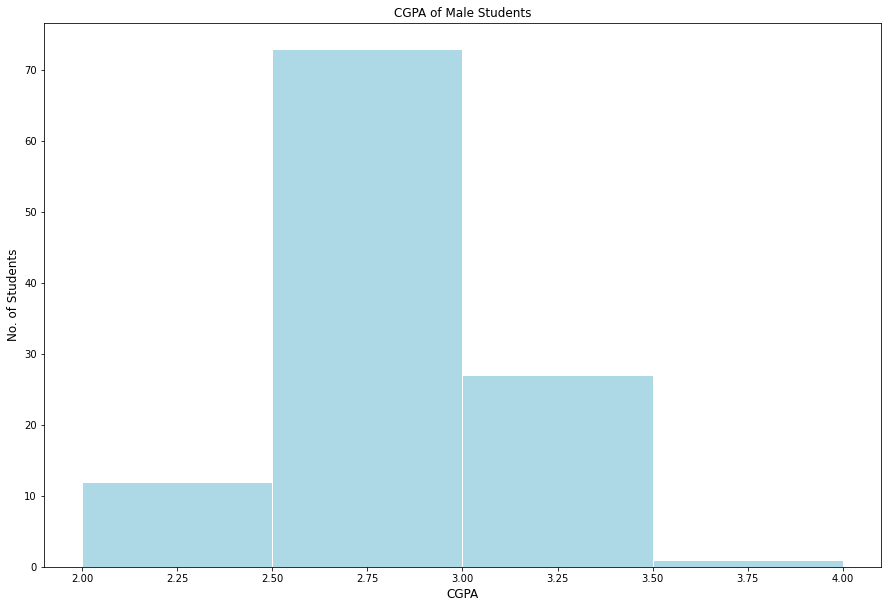

In [21]:
# Plot the CGPA of all male students on a histogram with intervals 2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0

CGPA_male = []

i = 0
for gender in data['Gender']:
    if(gender == 'Male'):
        CGPA_male.append(float(data['CGPA'][i]))    
    i+=1 

plt.figure(figsize=(15,10))
plt.hist(CGPA_male, edgecolor = 'white',bins = [2.0, 2.5, 3.0, 3.5, 4.0], color = 'lightblue')
plt.title('CGPA of Male Students', fontsize = 12)
plt.xlabel('CGPA', fontsize = 12)
plt.ylabel('No. of Students', fontsize = 12)

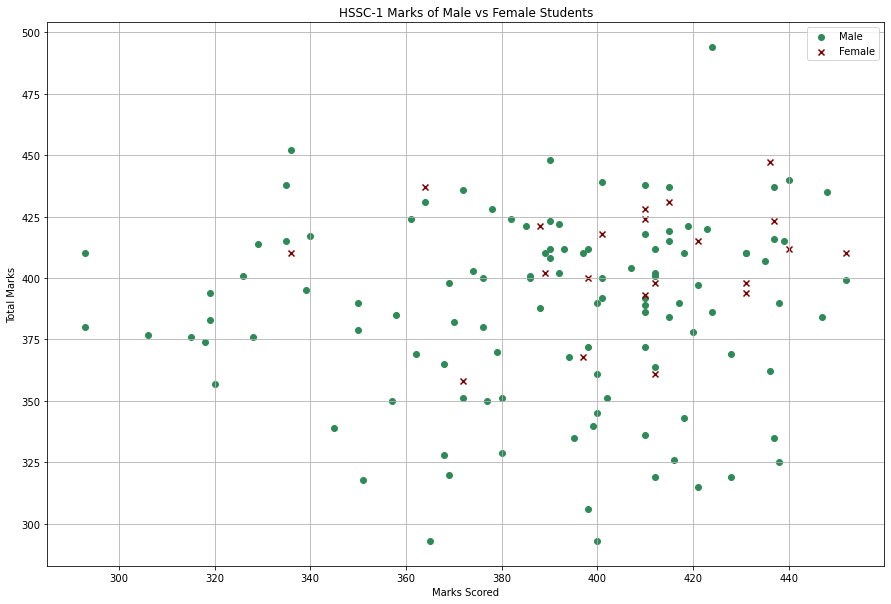

In [22]:
# Plot the HSSC-1 marks of all male vs female students on a scatter plot.

male_marks = []
female_marks = []
grades_range = []

for i in range(len(data['HSSC-1'])):
    if(int(data['HSSC-1'][i]) <= 510):
        marks = int(data['HSSC-1'][i])
        
    if(data['Gender'][i] == 'Male'):
        male_marks.append(marks)
    else:
        female_marks.append(marks)

for i in range(len(data['HSSC-1'])):
    if(int(data['HSSC-1'][i]) <= 510):
        marks = int(data['HSSC-1'][i])
    grades_range.append(marks)

i = 0
range_diff = len(data['HSSC-1']) - len(male_marks)
while (i < range_diff):
    male_marks.append('NaN')
    i += 1

i = 0
range_diff = len(data['HSSC-1']) - len(female_marks)
while (i < range_diff):
    female_marks.append('NaN')
    i += 1

plt.figure(figsize=(15,10))    
plt.scatter(grades_range, male_marks, marker='o', color = 'SeaGreen')
plt.scatter(grades_range,female_marks, marker='x', color = 'Maroon')
plt.title('HSSC-1 Marks of Male vs Female Students')
plt.xlabel('Marks Scored')
plt.ylabel('Total Marks')
plt.grid()
plt.legend(['Male' , 'Female'])
plt.show()



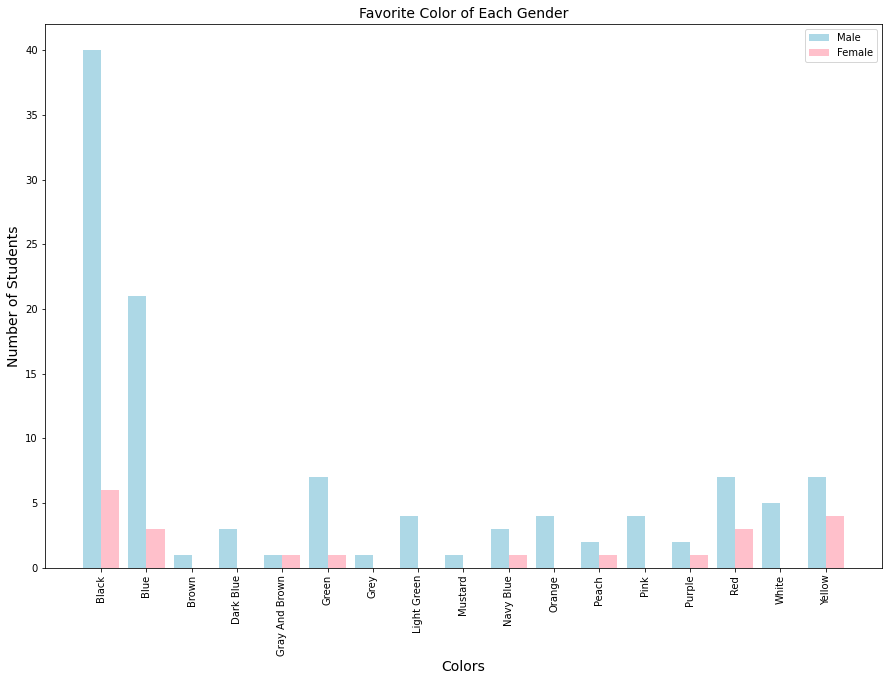

In [23]:
# Plot the favorite colors of male vs female students on a bar chart.

x = []

for color in data['FavoriteColor']:
    x.append(color)

x = np.unique(x)
jsonObj = {'Color':x}
colors = pd.DataFrame(x) 
colors = pd.DataFrame(jsonObj)
colors

male = []
female = []
for color in colors['Color']:
    male_frequency = 0
    female_frequency = 0
    for clr, gndr in zip(data['FavoriteColor'], data['Gender']):
        if color == clr:
            if(gndr == 'Male'):
                male_frequency+=1
            else:
                female_frequency+=1
    male.append(male_frequency)
    female.append(female_frequency)
    
X_axis = np.arange(len(x))
 
plt.figure(figsize=(15,10))
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male', color = 'lightblue')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female', color = 'pink')

plt.xticks(X_axis, x, rotation='vertical')
plt.xlabel('Colors', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.title('Favorite Color of Each Gender', fontsize = 14)
plt.legend()
plt.show()

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
[8, 19, 18, 5, 9, 4, 6, 8, 12, 28, 9, 8]


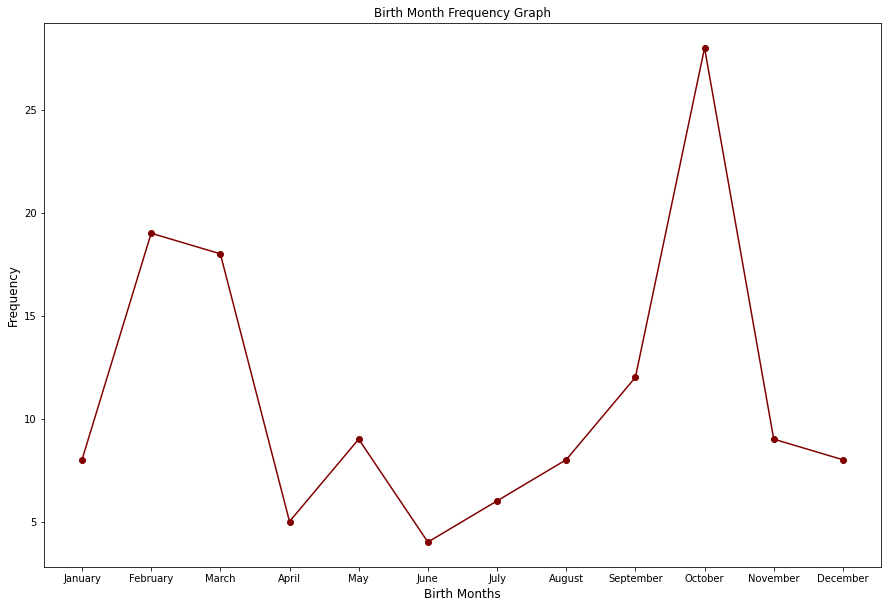

In [24]:
# Plot the favorite colors of male vs female students on a bar chart.

month_frequency = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

i = 0
for x in data['BirthMonth']:
    if(x == 'January'):
        month_frequency[0] += 1
    elif(x == 'February'):
        month_frequency[1] += 1
    elif(x == 'March'):
        month_frequency[2] += 1
    elif(x == 'April'):
        month_frequency[3] += 1
    elif(x == 'May'):
        month_frequency[4] += 1
    elif(x == 'June'):
        month_frequency[5] += 1
    elif(x == 'July'):
        month_frequency[6] += 1
    elif(x == 'August'):
        month_frequency[7] += 1
    elif(x == 'September'):
        month_frequency[8] += 1
    elif(x == 'October'):
        month_frequency[9] += 1
    elif(x == 'November'):
        month_frequency[10] += 1
    elif(x == 'December'):
        month_frequency[11] += 1

x = np.arange(start=1, stop=13, step = 1)
my_xticks = ['January','February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print(my_xticks)
print(month_frequency)
plt.figure(figsize=(15,10))
plt.xticks(x, my_xticks)
plt.plot(x, month_frequency, marker='o', color = 'maroon')
plt.title('Birth Month Frequency Graph', fontsize = 12)
plt.xlabel('Birth Months', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

Correlation matrix between HSSC-1 and HSSC-2 marks: 
          HSSC-1    HSSC-2
HSSC-1  1.000000  0.144829
HSSC-2  0.144829  1.000000


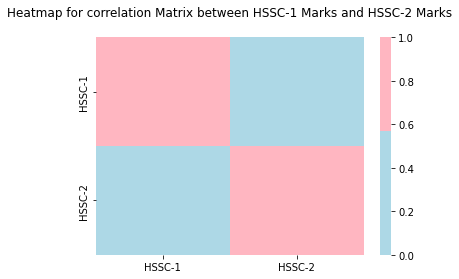

In [25]:
# Create a correlation matrix between HSSC-1 and HSSC-2 marks and then plot on a heatmap.

hssc_1 = []
hssc_2 = []
for i in range(len(data['HSSC-1'])):
    if( int(data['HSSC-1'][i]) <= 510 ):
        marks1 = int(data['HSSC-1'][i])
        hssc_1.append(marks1)
        marks2 = int(data['HSSC-2'][i])
        hssc_2.append(marks2)

data = {
    'HSSC-1': np.array(hssc_1),
    'HSSC-2':  np.array(hssc_2)
}

dataframe = pd.DataFrame(data, columns=['HSSC-1', 'HSSC-2'])

corr_matrix = dataframe.corr()
print('Correlation matrix between HSSC-1 and HSSC-2 marks: ')
print(corr_matrix)

plt.title('Heatmap for correlation Matrix between HSSC-1 Marks and HSSC-2 Marks\n')
sn.heatmap(corr_matrix, vmin=0, vmax=1, center=0.57, cmap = ['Lightblue', 'Lightpink'])
plt.show()

([<matplotlib.patches.Wedge at 0x1979b6cbd90>,
 [Text(0.5672261678052624, 1.0574755196017336, 'Black'),
  Text(-1.0947234982267595, 0.4915083543849141, 'Blue'),
  Text(-1.1838763677125197, -0.19605291625428717, 'Brown'),
  Text(-1.160315706783859, -0.30605140187666796, 'Dark Blue'),
  Text(-1.1165583259629863, -0.4396561209885899, 'Gray And Brown'),
  Text(-0.9838780658963924, -0.6870108816081256, 'Green'),
  Text(-0.8181693358532174, -0.8778376489246205, 'Grey'),
  Text(-0.7098866024216599, -0.9675024608248973, 'Light Green'),
  Text(-0.5918602174691138, -1.0438876773759778, 'Mustard'),
  Text(-0.46571016926037734, -1.105944862209446, 'Navy Blue'),
  Text(-0.2513282632074674, -1.1733857439534188, 'Orange'),
  Text(-0.05624666455527093, -1.1986810721482202, 'Peach'),
  Text(0.14034643367395194, -1.1917646070239722, 'Pink'),
  Text(0.33316804470811107, -1.1528222126526595, 'Purple'),
  Text(0.6637574137199803, -0.9997130066832995, 'Red'),
  Text(0.9675024338237423, -0.7098866392214569, 

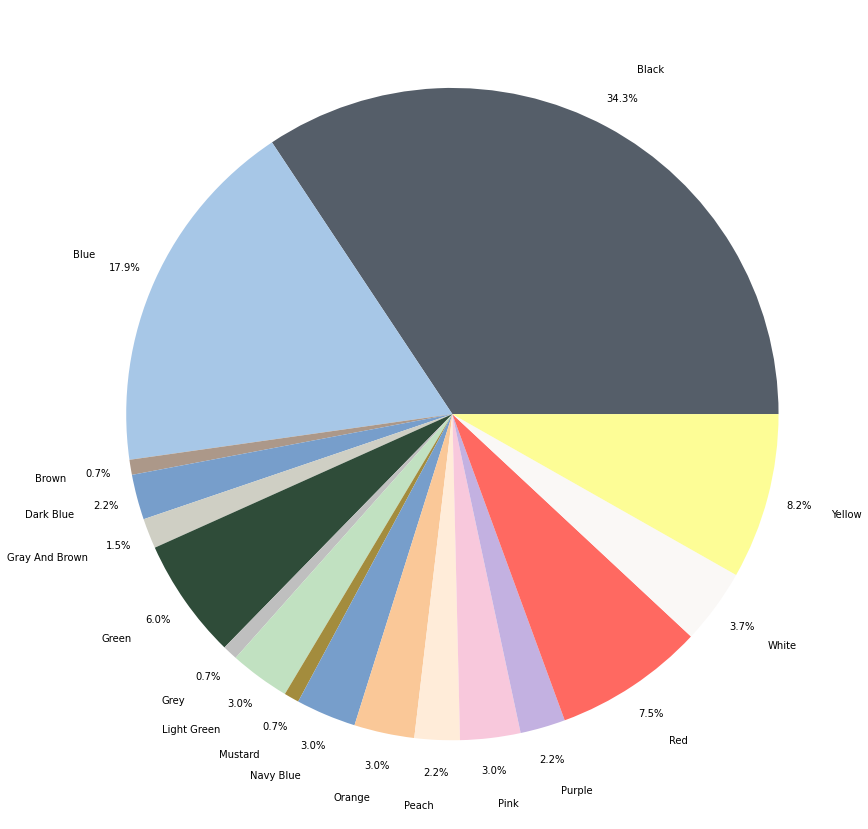

In [30]:
# Ploting a Pie Chart for the ratio of favorite colors

colors = []
colors_unique = []

for color in data['FavoriteColor']:
    colors.append(color)

colors_unique = np.unique(colors)

color_frequency = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

i = 0
for x in colors:
    if(x == 'Black'):
        color_frequency[0] += 1
    elif(x == 'Blue'):
        color_frequency[1] += 1
    elif(x == 'Brown'):
        color_frequency[2] += 1
    elif(x == 'Dark Blue'):
        color_frequency[3] += 1
    elif(x == 'Gray And Brown'):
        color_frequency[4] += 1
    elif(x == 'Green'):
        color_frequency[5] += 1
    elif(x == 'Grey'):
        color_frequency[6] += 1
    elif(x == 'Light Green'):
        color_frequency[7] += 1
    elif(x == 'Mustard'):
        color_frequency[8] += 1
    elif(x == 'Navy Blue'):
        color_frequency[9] += 1
    elif(x == 'Orange'):
        color_frequency[10] += 1
    elif(x == 'Peach'):
        color_frequency[11] += 1
    elif(x == 'Pink'):
        color_frequency[12] += 1
    elif(x == 'Purple'):
        color_frequency[13] += 1
    elif(x == 'Red'):
        color_frequency[14] += 1
    elif(x == 'White'):
        color_frequency[15] += 1
    elif(x == 'Yellow'):
        color_frequency[16] += 1
pie_colors = ['#555e69', '#A7C7E7', '#ac9889', '#779ecb', '#cfcfc4', '#2F4C39', '#BFBFBF', '#C1E1C1', '#a38c3d', '#779ecb', '#FAC898', '#ffecd9', '#F8C8DC', '#C3B1E1', '#ff6961', '#FAF8F6', '#FDFD96']
plt.figure(figsize=(15,15))
plt.pie(color_frequency, labels = colors_unique, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2, colors = pie_colors)

[45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]


Text(0, 0.5, 'No. of Students')

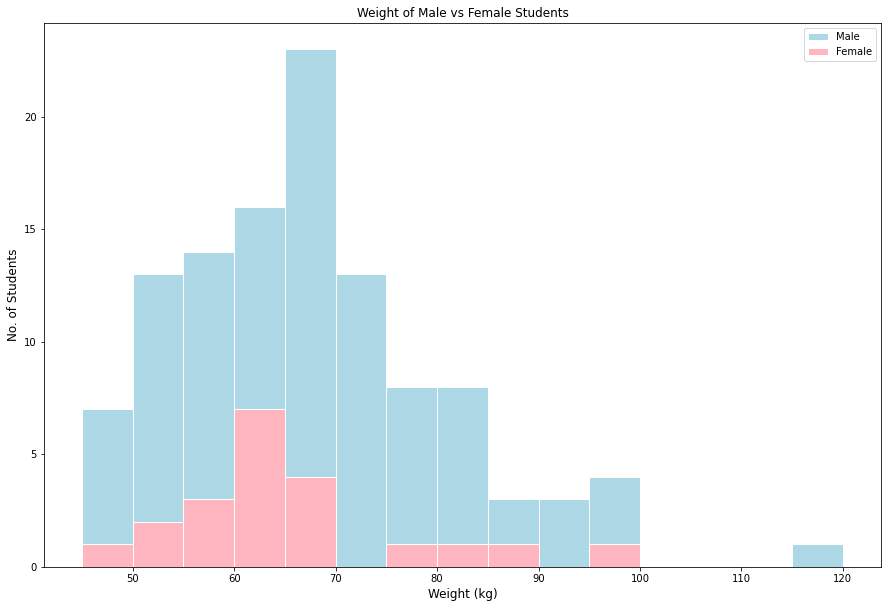

In [31]:
# Plot Histogram for Male vs Female Students Weight.

weight_male = []
weight_female = []

i = 0
for gender in data['Gender']:
    if(gender == 'Male'):
        weight_male.append(float(data['Weight'][i]))    
    i+=1 
    
i = 0
for gender in data['Gender']:
    if(gender == 'Female'):
        weight_female.append(float(data['Weight'][i]))    
    i+=1 
    
weights_range = [*range(45,125,5)]

print(weights_range)
    
plt.figure(figsize=(15, 10))
plt.hist(weight_male, edgecolor = 'white', bins = weights_range, label = 'Male', color = 'lightblue')
plt.hist(weight_female, edgecolor = 'white', bins = weights_range, label = 'Female', color = 'lightpink')
plt.legend()
plt.title('Weight of Male vs Female Students', fontsize = 12)
plt.xlabel('Weight (kg)', fontsize = 12)
plt.ylabel('No. of Students', fontsize = 12)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


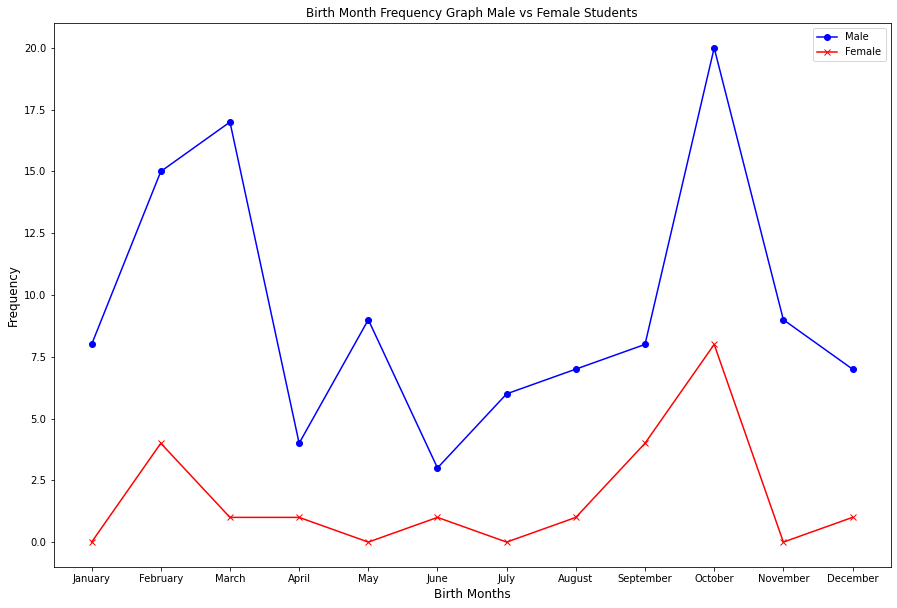

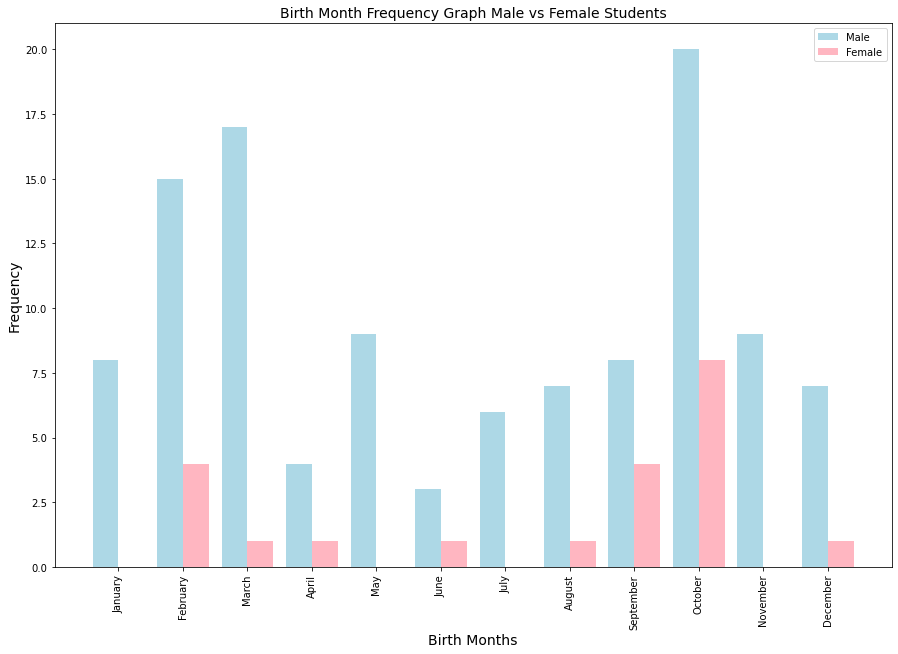

In [32]:
# BarChart and LineGraph for Birth Month Frequency Graph Male vs Female Students.

male_month_frequency = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
female_month_frequency = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
i = 0
for x in data['BirthMonth']:
    if data['Gender'][i] == 'Male':
        if(x == 'January'):
            male_month_frequency[0] += 1
        elif(x == 'February'):
            male_month_frequency[1] += 1
        elif(x == 'March'):
            male_month_frequency[2] += 1
        elif(x == 'April'):
            male_month_frequency[3] += 1
        elif(x == 'May'):
            male_month_frequency[4] += 1
        elif(x == 'June'):
            male_month_frequency[5] += 1
        elif(x == 'July'):
            male_month_frequency[6] += 1
        elif(x == 'August'):
            male_month_frequency[7] += 1
        elif(x == 'September'):
            male_month_frequency[8] += 1
        elif(x == 'October'):
            male_month_frequency[9] += 1
        elif(x == 'November'):
            male_month_frequency[10] += 1
        elif(x == 'December'):
            male_month_frequency[11] += 1
    i+=1

i=0
for x in data['BirthMonth']:
    if data['Gender'][i] == 'Female':
        if(x == 'January'):
            female_month_frequency[0] += 1
        elif(x == 'February'):
            female_month_frequency[1] += 1
        elif(x == 'March'):
            female_month_frequency[2] += 1
        elif(x == 'April'):
            female_month_frequency[3] += 1
        elif(x == 'May'):
            female_month_frequency[4] += 1
        elif(x == 'June'):
            female_month_frequency[5] += 1
        elif(x == 'July'):
            female_month_frequency[6] += 1
        elif(x == 'August'):
            female_month_frequency[7] += 1
        elif(x == 'September'):
            female_month_frequency[8] += 1
        elif(x == 'October'):
            female_month_frequency[9] += 1
        elif(x == 'November'):
            female_month_frequency[10] += 1
        elif(x == 'December'):
            female_month_frequency[11] += 1
    i+=1

x = np.arange(start=1, stop=13, step = 1)
my_xticks = ['January','February','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print(my_xticks)
plt.figure(figsize=(15,10))
plt.xticks(x, my_xticks)
plt.plot(x, male_month_frequency, marker='o', color = 'blue', label = 'Male')
plt.plot(x, female_month_frequency, marker='x', color = 'red', label = 'Female')
plt.title('Birth Month Frequency Graph Male vs Female Students', fontsize = 12)
plt.xlabel('Birth Months', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend()
plt.show()

X_axis = np.arange(len(my_xticks))
plt.figure(figsize=(15,10))
plt.bar(X_axis - 0.2, male_month_frequency, 0.4, label = 'Male', color = 'lightblue')
plt.bar(X_axis + 0.2, female_month_frequency, 0.4, label = 'Female', color = 'lightpink')
plt.xticks(X_axis, my_xticks, rotation='vertical')
plt.xlabel('Birth Months', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Birth Month Frequency Graph Male vs Female Students', fontsize = 14)
plt.legend()
plt.show()